## misic21

In [1]:
from music21 import environment

#us = environment.UserSettings()
#us.getSettingsPath()

PosixPath('/Users/pon_dad/.music21rc')

In [2]:
#from music21 import environment

#us = environment.UserSettings()
#us.create()
#us['musescoreDirectPNGPath'] = '/Applications/MuseScore 3.app/Contents/MacOS/mscore'
#us['musicxmlPath'] = '/Applications/MuseScore 3.app/Contents/MacOS/mscore'

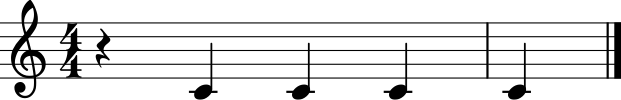

pygame 2.0.0.dev4 (SDL 2.0.10, python 3.7.1)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
import music21
from music21 import *

stream1 = stream.Stream()
note = note.Note("C4", quarterLength = 1)
stream1.insert(0,music21.note.Rest())
stream1.repeatAppend(note, 4)
stream1.show()

sp=midi.realtime.StreamPlayer(stream1)
sp.play()

In [9]:
import music21
f = music21.note.Note("F5")
score = music21.stream.Stream()
score.append(music21.note.Rest())
score.append(f)

score.show('midi')

4
5


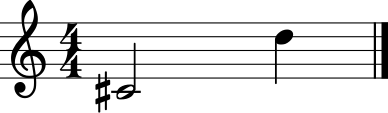

In [4]:
from music21 import *

s1 = stream.Stream()
s1.append(note.Note('C#4', type='half'))
s1.append(note.Note('D5', type='quarter'))
s1.duration.quarterLength
for thisNote in s1.notes:
    print(thisNote.octave)
s1.show()

{0.0} <music21.clef.TrebleClef>
{0.0} <music21.stream.Part embeddedPart>
    {0.0} <music21.note.Rest rest>
{1.0} <music21.note.Note E->


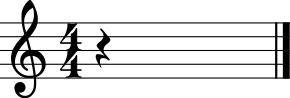

In [7]:
c1 = clef.TrebleClef()
c1.offset = 0.0
c1.priority = -1
n1 = note.Note('E-6', type='eighth')
n1.offset = 1.0
p1 = stream.Part()
p1.offset = 0.0
p1.id = 'embeddedPart'
p1.append(note.Rest())  # quarter rest
s2 = stream.Stream([c1, n1, p1])
#s2.duration.quarterLength
s2.show('text')
s2.show()
s2.show("midi")

In [23]:
import pygame

def play_music(music_file):
    """
    stream music with mixer.music module in blocking manner
    this will stream the sound from disk while playing
    """
    clock = pygame.time.Clock()
    try:
        pygame.mixer.music.load(music_file)
        print ("Music file %s loaded!" % music_file)
    except pygame.error:
        print ("File %s not found! (%s)" % (music_file, pygame.get_error()))
        return
    pygame.mixer.music.play()
    while pygame.mixer.music.get_busy():
        # check if playback has finished
        clock.tick(30)
# pick a midi music file you have ...
# (if not in working folder use full path)

midi_file = 'twinkle_twinkle.mid'
freq = 44100    # audio CD quality
bitsize = -16   # unsigned 16 bit
channels = 2    # 1 is mono, 2 is stereo
buffer = 1024    # number of samples
pygame.mixer.init(freq, bitsize, channels, buffer)

# optional volume 0 to 1.0
pygame.mixer.music.set_volume(0.8)
try:
    play_music(midi_file)
except KeyboardInterrupt:
    # if user hits Ctrl/C then exit
    # (works only in console mode)
    pygame.mixer.music.fadeout(1000)
    pygame.mixer.music.stop()
    raise SystemExit

Music file twinkle_twinkle.mid loaded!


In [25]:
!python3 play.py  'twinkle_twinkle.mid'

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
Music file twinkle_twinkle.mid loaded!


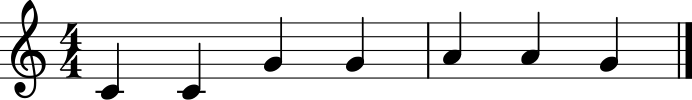

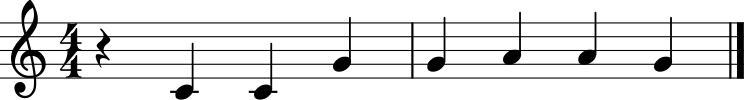

In [2]:
from music21 import note,stream,corpus,chord,environment,converter,midi
stream2 = converter.parse('tinyNotation: 4/4 c4 c4 g4 g4 a4 a4 g4')
stream2.show()
stream2.show("midi")

stream2 = converter.parse('tinyNotation: 4/4 r c4 c4 g4 g4 a4 a4 g4')
stream2.show()
stream2.show("midi")

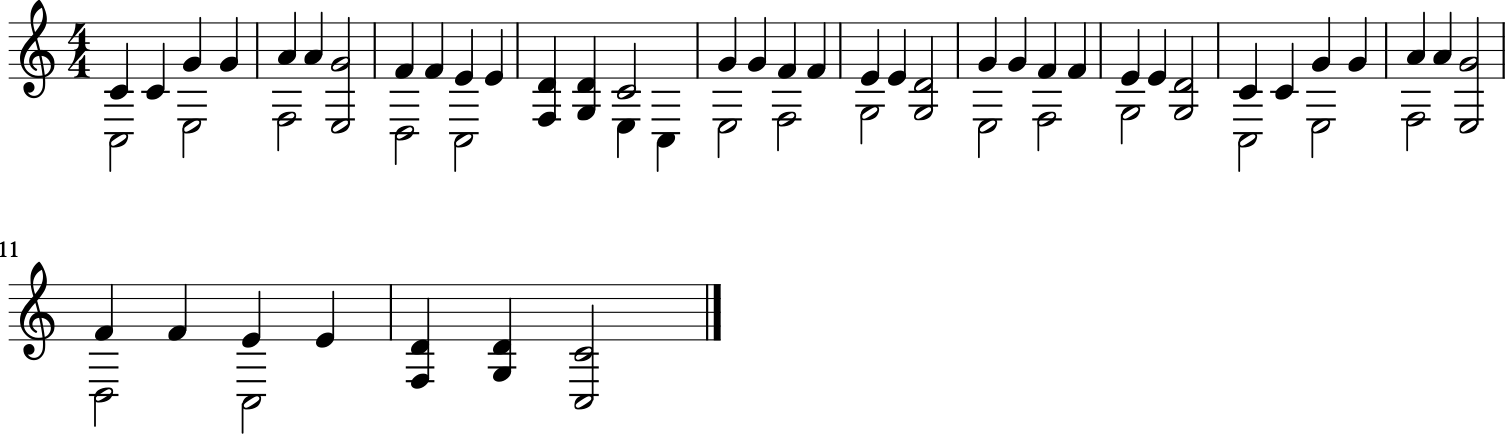

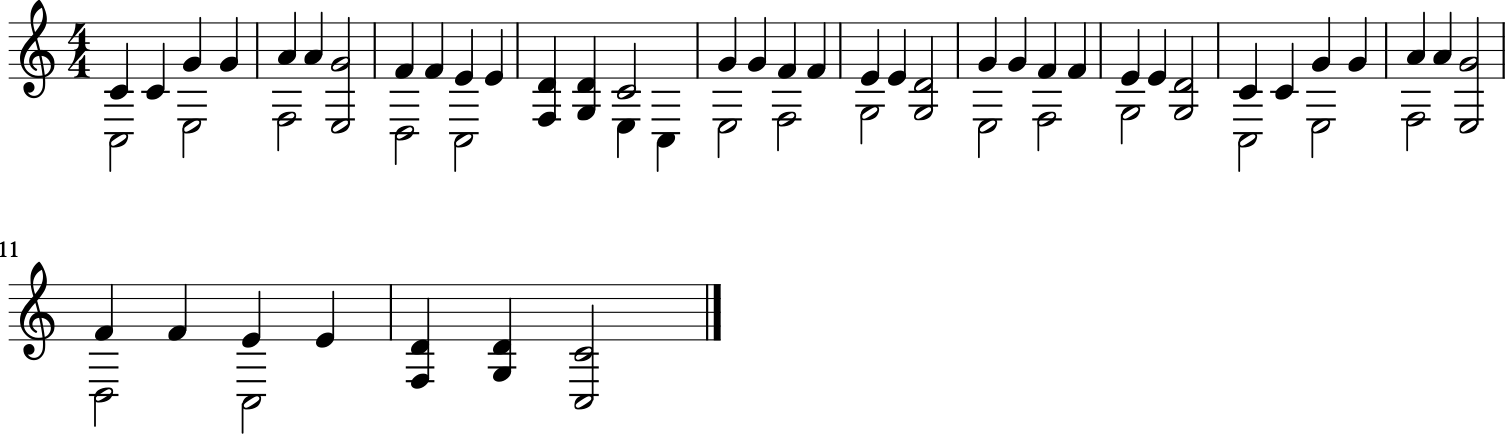

In [16]:
from music21 import converter, instrument, note, chord, stream
import numpy as np
nocturne = converter.parse('twinkle_twinkle.mid')
nocturne.show()
blank= note.Note("C4", quarterLength = 1)
nocturne.insert(0,blank)
nocturne.show()
nocturne.show("midi")

In [2]:
nocturne = converter.parse('twinkle_twinkle.mid')

parts = instrument.partitionByInstrument(nocturne)

print(parts)

notes_to_parse = parts.parts[0].recurse()  # 対象のパートを一つに絞る

print(notes_to_parse)

string_nocturne_notes = []

for element in notes_to_parse:
    if isinstance(element, note.Note):
      string_nocturne_notes.append(str(element.pitch))
    elif isinstance(element, chord.Chord):
      string_nocturne_notes.append('.'.join(str(n) for n in element.normalOrder))

<music21.stream.Score 0x113974390>
<music21.stream.iterator.RecursiveIterator for Part:Piano @:0>


In [3]:
print(string_nocturne_notes)

['C4', 'C3', 'C4', 'G4', 'E3', 'G4', 'A4', 'F3', 'A4', '4.7', 'F4', 'D3', 'F4', 'E4', 'C3', 'E4', '2.5', '2.7', 'C4', 'E3', 'C3', 'G4', 'E3', 'G4', 'F4', 'F3', 'F4', 'E4', 'G3', 'E4', '2.7', 'G4', 'E3', 'G4', 'F4', 'F3', 'F4', 'E4', 'G3', 'E4', '2.7', 'C4', 'C3', 'C4', 'G4', 'E3', 'G4', 'A4', 'F3', 'A4', '4.7', 'F4', 'D3', 'F4', 'E4', 'C3', 'E4', '2.5', '2.7', '0']


In [4]:
notenames = sorted(set(string_nocturne_notes)) #音名
print(notenames)

['0', '2.5', '2.7', '4.7', 'A4', 'C3', 'C4', 'D3', 'E3', 'E4', 'F3', 'F4', 'G3', 'G4']


In [5]:
note2int = dict((string_note, number) for number, string_note in enumerate(notenames))
print(note2int)

{'0': 0, '2.5': 1, '2.7': 2, '4.7': 3, 'A4': 4, 'C3': 5, 'C4': 6, 'D3': 7, 'E3': 8, 'E4': 9, 'F3': 10, 'F4': 11, 'G3': 12, 'G4': 13}


In [6]:
numerical_nocturne_notes = []
for string_note in string_nocturne_notes:
    numerical_nocturne_notes.append(note2int[string_note])
    
print(numerical_nocturne_notes)

[6, 5, 6, 13, 8, 13, 4, 10, 4, 3, 11, 7, 11, 9, 5, 9, 1, 2, 6, 8, 5, 13, 8, 13, 11, 10, 11, 9, 12, 9, 2, 13, 8, 13, 11, 10, 11, 9, 12, 9, 2, 6, 5, 6, 13, 8, 13, 4, 10, 4, 3, 11, 7, 11, 9, 5, 9, 1, 2, 0]


In [7]:
def create_midi(prediction_output):
    """ convert the output from the prediction to notes and create a midi file
        from the notes """
    offset = 0
    output_notes = []

    # create note and chord objects based on the values generated by the model
    for pattern in prediction_output:
        # pattern is a chord
        if ('.' in pattern) or pattern.isdigit():
            notes_in_chord = pattern.split('.')
            notes = []
            for current_note in notes_in_chord:
                new_note = note.Note(int(current_note))
                new_note.storedInstrument = instrument.Piano()
                notes.append(new_note)
            new_chord = chord.Chord(notes)
            new_chord.offset = offset
            output_notes.append(new_chord)
        # pattern is a note
        else:
            new_note = note.Note(pattern)
            new_note.offset = offset
            new_note.storedInstrument = instrument.Piano()
            output_notes.append(new_note)

        # increase offset each iteration so that notes do not stack
        offset += 0.5

    midi_stream = stream.Stream(output_notes)

    midi_stream.write('midi', fp='test_output.mid')

In [8]:
create_midi(numerical_nocturne_notes)

TypeError: argument of type 'int' is not iterable

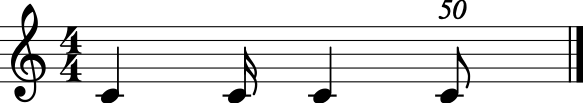

In [5]:
import music21
from music21 import *
s2 = stream.Stream()

n = note.Note(midi=60,quarterLength = 1)
s2.append(n)
n2 = note.Note(midi=60,quarterLength = 0.25)
s2.append(n2)
n = note.Note(midi=60,quarterLength = 1)
s2.append(n)
n3 = note.Note(midi=60,quarterLength = 0.33)
s2.append(n3)

s2.show()